# Predicting and Analyzing income using Census Dataset

We will use the census data set, to predict annual income greater or less than 50k using classification method.<br>
Created by <i>LuccasDev</i>
<p>See on github: <a src="www.github.com/luccasdev">LuccasDev</a></p>

## • Let's go analyze the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df = pd.read_csv('dataset\\census.csv')
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


On describe we can see the minimal age as 17 years ago and maximum age as 90 years ago.

In [2]:
data = df.iloc[:, 0:14].values
target = df.iloc[:, 14].values

Show the income count, more than 50k vs more less 50k.

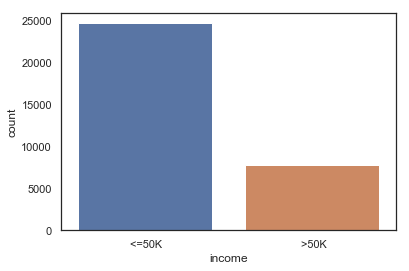

In [111]:
sns.countplot(df['income'],label="Count")
plt.show()

## Income / Age

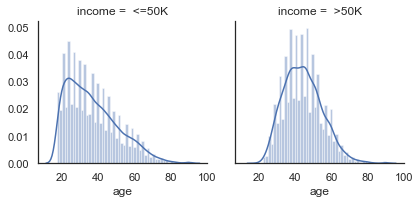

In [27]:
g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")
plt.show()

Transform target to 0 or 1 (0 for <=50k, 1 for > 50k).

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelEncoder_classe = LabelEncoder()
df['income'] = labelEncoder_classe.fit_transform(target)

## Income > 50k : Male vs Female

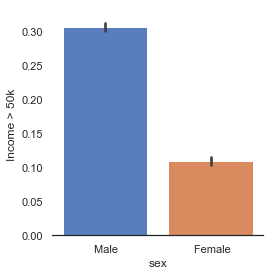

In [60]:
g = sns.catplot(x="sex",y="income",data=df,kind="bar" ,height=4,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income > 50k")
plt.show()

## Education Num vs Income

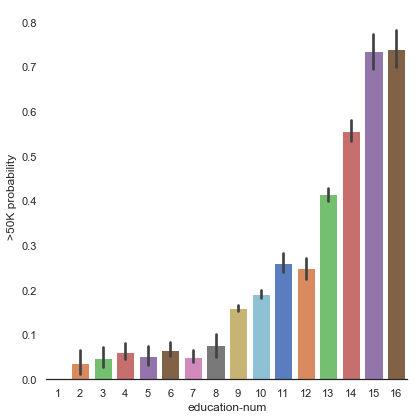

In [67]:
g = sns.catplot(x="education-num",y="income",data=df,kind="bar",height=6,palette="muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

## Relationship vs Income

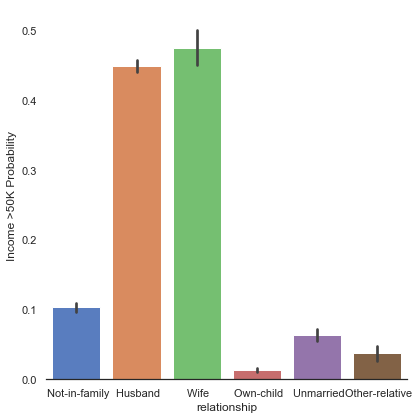

In [71]:
g = sns.catplot(x="relationship",y="income",data=df,kind="bar",height=6,palette="muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

## Now transform features

In [83]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelEncoder= LabelEncoder()
data[:, 1] = labelEncoder.fit_transform(data[:, 1])
data[:, 3] = labelEncoder.fit_transform(data[:, 3])
data[:, 5] = labelEncoder.fit_transform(data[:, 5])
data[:, 6] = labelEncoder.fit_transform(data[:, 6])
data[:, 7] = labelEncoder.fit_transform(data[:, 7])
data[:, 8] = labelEncoder.fit_transform(data[:, 8])
data[:, 9] = labelEncoder_previsores.fit_transform(data[:, 9])
data[:, 13] = labelEncoder.fit_transform(data[:, 13])

## Scheduling 

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)


## Create Model

In [92]:
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(data,target,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.825591 (0.004918)
LDA: 0.815840 (0.005894)
KNN: 0.826781 (0.005494)
CART: 0.808469 (0.006892)
NB: 0.802020 (0.009341)
RF: 0.855344 (0.004833)


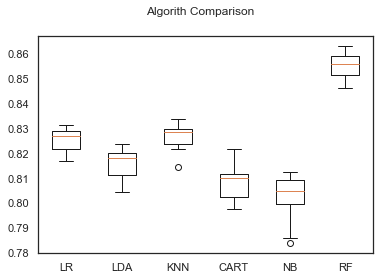

In [93]:
figure = plt.figure()
figure.suptitle('Algorith Comparison')
ax= figure.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Best algorithm score is RF, accuracy: 0.85

In [94]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 85.90511285122064%
[[4605  346]
 [ 572  990]]
             precision    recall  f1-score   support

          0       0.89      0.93      0.91      4951
          1       0.74      0.63      0.68      1562

avg / total       0.85      0.86      0.86      6513



<p>See on github: <a src="www.github.com/luccasdev">LuccasDev</a></p>